<a href="https://colab.research.google.com/github/hammedb197/detectron_u/blob/master/doccument_tag_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

'My Drive'


In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [1]:
# %cd My\ Drive/document_tag_classification
!ls

README.md   doccument_tag_detection.ipynb
detectron2  document_tag_classification.ipynb


In [ ]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu100/torch-1.4.0%2Bcu100-cp36-cp36m-linux_x86_64.whl (723.9 MB)
  Using cached https://download.pytorch.org/whl/cu100/torchvision-0.5.0%2Bcu100-cp36-cp36m-linux_x86_64.whl (4.0 MB)


In [ ]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


In [ ]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:

from detectron2.data.datasets import register_coco_instances

register_coco_instances("train", {}, "dataset/train/train.json", "dataset/")
register_coco_instances("test", {}, "dataset/test/test.json", "dataset/")



In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
train_metadata = MetadataCatalog.get("train")
train_dicts = DatasetCatalog.get("train")

In [ ]:
print(train_metadata)

Metadata(evaluator_type='coco', image_root='dataset/', json_file='dataset/train/train.json', name='train', thing_classes=['form footer', 'subject', 'form instruction', 'form table', 'form header', 'form body', 'address', 'signature', ''], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8})


In [ ]:
# print(train_dicts)
# !cat dataset/train/train.json
train_meta_dict = train_metadata.as_dict()
thin_classes = train_meta_dict['thing_classes']
thing_data_dict = train_meta_dict['thing_dataset_id_to_contiguous_id']
print(train_meta_dict['thing_classes'])

print(train_meta_dict['thing_dataset_id_to_contiguous_id'])




['form footer', 'subject', 'form instruction', 'form table', 'form header', 'form body', 'address', 'signature', '']
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}


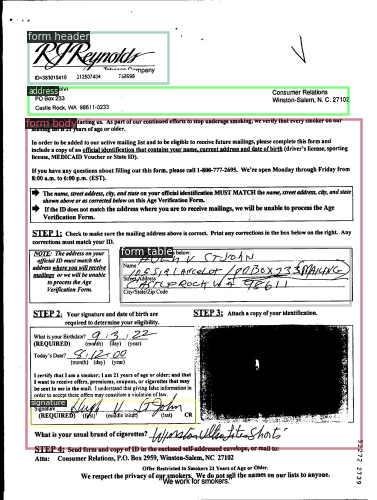

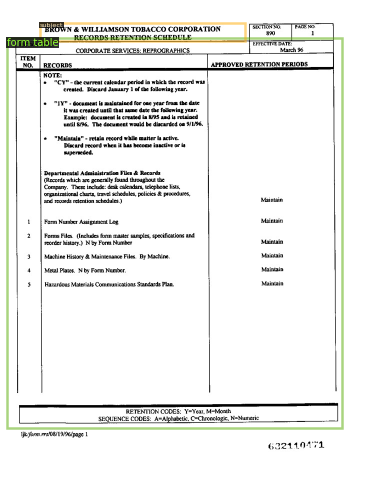

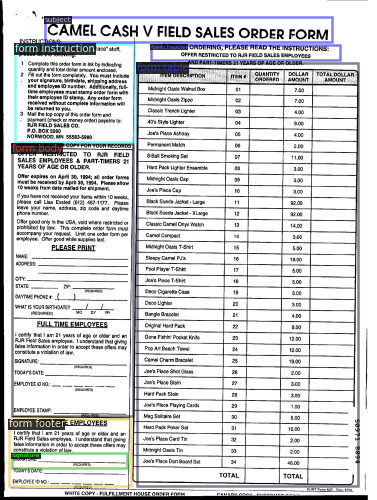

In [ ]:
from detectron2.utils.visualizer import ColorMode
import random
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow



for d in random.sample(train_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:

# for d in random.sample(train_dicts, 3):
#     print(d)

{'file_name': 'dataset/images/form17611.jpg', 'height': 1000, 'width': 754, 'image_id': 17611, 'annotations': [{'iscrowd': 0, 'bbox': [36, 902, 647, 41], 'category_id': 0, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [8, 207, 674, 681], 'category_id': 5, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [141, 135, 613, 61], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [73, 17, 659, 106], 'category_id': 4, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': 'dataset/images/form1044.jpg', 'height': 1000, 'width': 848, 'image_id': 1044, 'annotations': [{'iscrowd': 0, 'bbox': [210, 140, 579, 782], 'category_id': 5, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [213, 100, 611, 31], 'category_id': 2, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [220, 30, 583, 65], 'category_id': 4, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}
{'file_name': 'dataset/images/form17283.jpg', 'height': 1000, 'width': 802, 'image_id': 

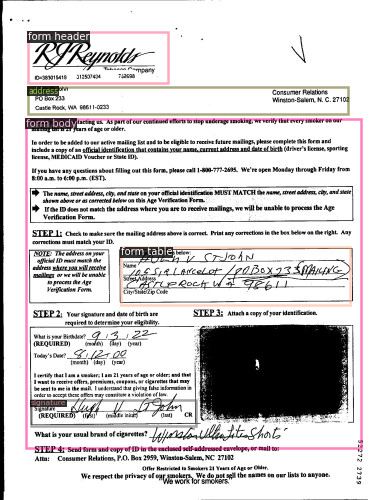

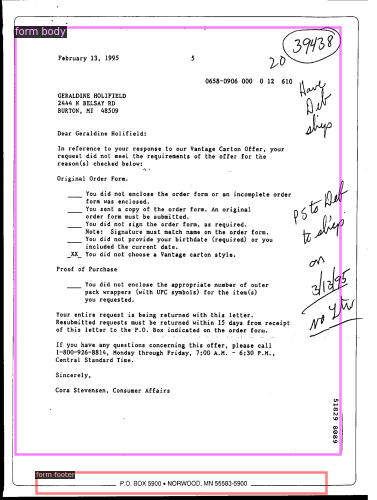

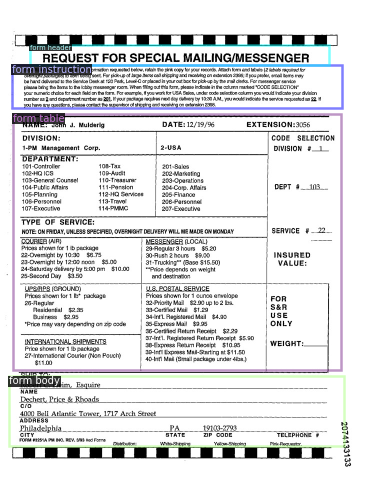

In [ ]:

for d in random.sample(train_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    # print(help(vis))
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
!ls dataset/train

form10030.jpg  form1103.jpg   form12569.jpg  form15293.jpg  form17611.jpg
form10096.jpg  form11479.jpg  form13288.jpg  form15365.jpg  form17829.jpg
form1027.jpg   form11524.jpg  form13762.jpg  form15842.jpg  form17864.jpg
form1044.jpg   form11576.jpg  form13765.jpg  form15856.jpg  form18382.jpg
form10465.jpg  form11637.jpg  form14297.jpg  form15968.jpg  form1867.jpg
form1053.jpg   form11808.jpg  form14328.jpg  form16607.jpg  form2299.jpg
form10810.jpg  form11944.jpg  form14446.jpg  form1726.jpg   train.json
form10825.jpg  form12079.jpg  form14745.jpg  form17279.jpg
form11014.jpg  form12112.jpg  form15282.jpg  form17283.jpg


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

# cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ("test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/08 20:42:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (9, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (9,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (32, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (32,) in the model! Skipped.


[04/08 20:42:54 d2.engine.train_loop]: Starting training from iteration 0
[04/08 20:42:59 d2.utils.events]:  eta: 0:01:09  iter: 19  total_loss: 5.855  loss_cls: 2.212  loss_box_reg: 0.579  loss_rpn_cls: 2.773  loss_rpn_loc: 0.442  time: 0.2481  data_time: 0.0146  lr: 0.000005  max_mem: 2308M
[04/08 20:43:04 d2.utils.events]:  eta: 0:01:03  iter: 39  total_loss: 4.047  loss_cls: 2.085  loss_box_reg: 0.733  loss_rpn_cls: 0.941  loss_rpn_loc: 0.307  time: 0.2445  data_time: 0.0045  lr: 0.000010  max_mem: 2308M
[04/08 20:43:09 d2.utils.events]:  eta: 0:00:59  iter: 59  total_loss: 3.124  loss_cls: 1.875  loss_box_reg: 0.887  loss_rpn_cls: 0.089  loss_rpn_loc: 0.288  time: 0.2463  data_time: 0.0046  lr: 0.000015  max_mem: 2308M
[04/08 20:43:14 d2.utils.events]:  eta: 0:00:54  iter: 79  total_loss: 2.849  loss_cls: 1.556  loss_box_reg: 0.922  loss_rpn_cls: 0.045  loss_rpn_loc: 0.278  time: 0.2475  data_time: 0.0048  lr: 0.000020  max_mem: 2308M
[04/08 20:43:19 d2.utils.events]:  eta: 0:00:4

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

Reusing TensorBoard on port 6006 (pid 3528), started 0:10:58 ago. (Use '!kill 3528' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3   # set the testing threshold for this model
cfg.DATASETS.TEST = ("test", )
predictor = DefaultPredictor(cfg)

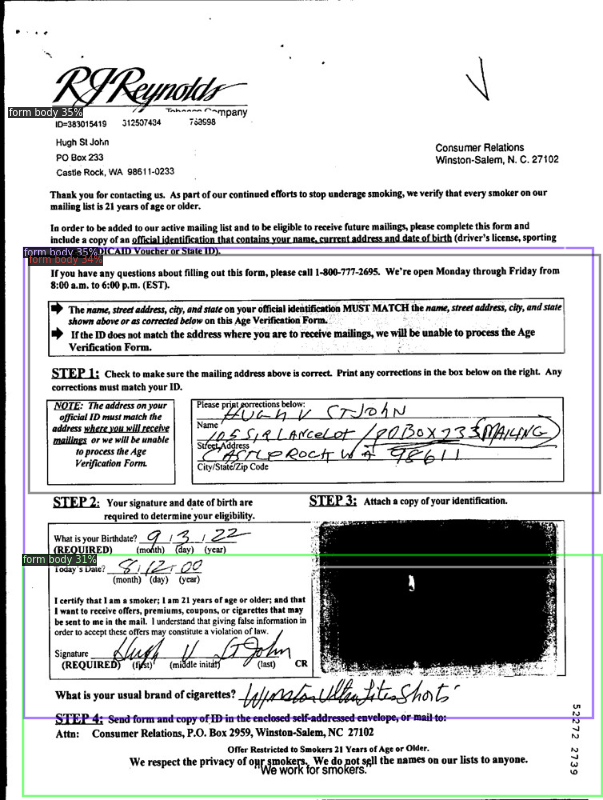

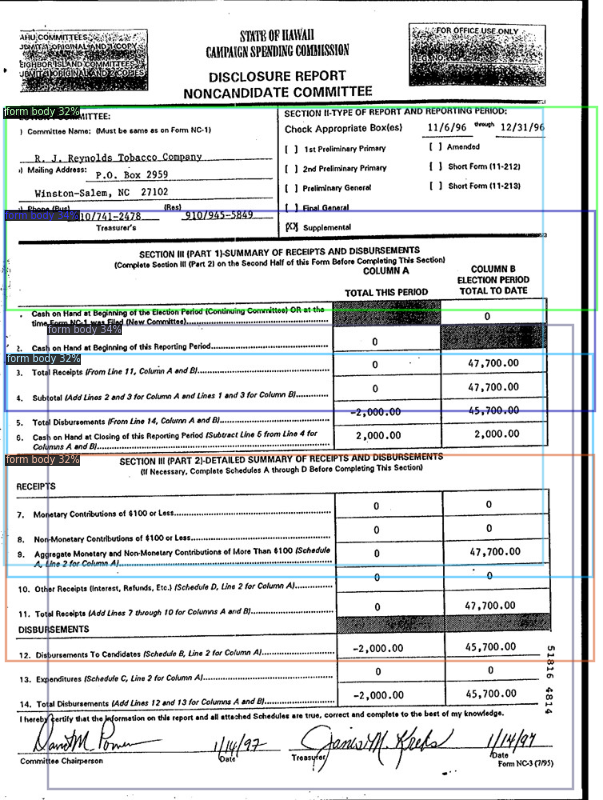

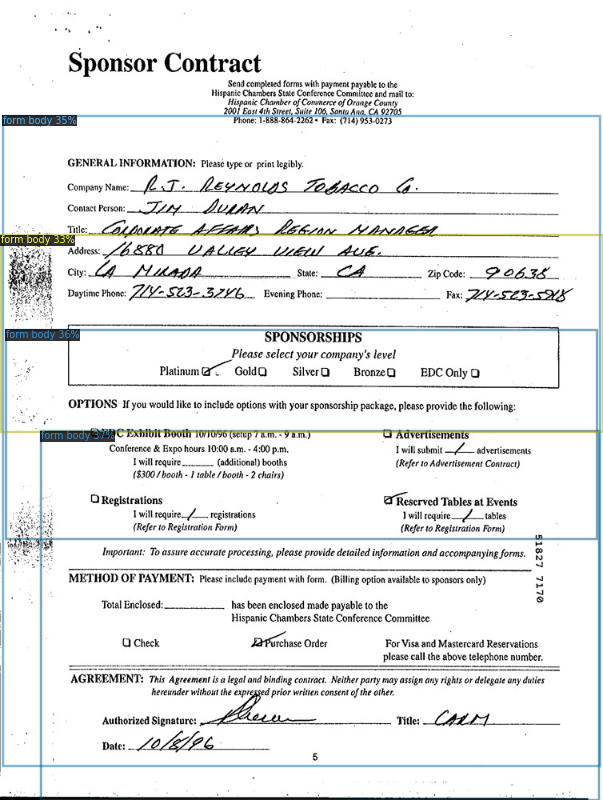

In [ ]:
from detectron2.utils.visualizer import ColorMode
for d in random.sample(train_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=train_metadata, 
                   scale=0.8, 
                  #  instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "test")
inference_on_dataset(trainer.model, val_loader, evaluator)


[04/08 20:44:12 d2.data.datasets.coco]: Loaded 15 images in COCO format from dataset/test/test.json
[04/08 20:44:12 d2.data.common]: Serializing 15 elements to byte tensors and concatenating them all ...
[04/08 20:44:12 d2.data.common]: Serialized dataset takes 0.00 MiB
[04/08 20:44:12 d2.evaluation.evaluator]: Start inference on 15 images
[04/08 20:44:17 d2.evaluation.evaluator]: Inference done 11/15. 0.0634 s / img. ETA=0:00:01
[04/08 20:44:19 d2.evaluation.evaluator]: Total inference time: 0:00:03.976038 (0.397604 s / img per device, on 1 devices)
[04/08 20:44:19 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.063098 s / img per device, on 1 devices)
[04/08 20:44:20 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[04/08 20:44:20 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[04/08 20:44:21 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
cr

OrderedDict([('bbox',
              {'AP': 3.8124603862620634,
               'AP-': nan,
               'AP-address': 0.0,
               'AP-form body': 10.278168636995282,
               'AP-form footer': 0.0,
               'AP-form header': 8.102659491026145,
               'AP-form instruction': 3.080929024076496,
               'AP-form table': 5.225465551736521,
               'AP-signature': 0.0,
               'AP-subject': nan,
               'AP50': 11.126073746370025,
               'AP75': 1.0446764504732664,
               'APl': 3.851683868096135,
               'APm': 0.0,
               'APs': nan})])

In [ ]:
import cv2
import pytesseract
import imutils
import numpy as np
import textract
from collections import Counter 


In [ ]:
# pip install pytesseract
!pip install imutils
!pip install textract
! apt install tesseract-ocr
! apt install libtesseract-dev
!sudo apt install tesseract-ocr


In [ ]:
def extract_from_images(img):
    # img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (_, binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
     # convert2binary
    contours = cv2.findContours(~binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if imutils.is_cv4() else contours[1]
    heights = [cv2.boundingRect(contour)[3] for contour in contours]
    average_ = sum(heights)/len(heights)
  
    mask = np.ones(img.shape[:2], dtype="uint8") * 255 
    #create empty image of the size of the image
    for c in contours:
        [x, y, w, h] = cv2.boundingRect(c)
        if h > average_ * 2:
            cv2.drawContours(mask, [c], -1, 0, -1)
            
    title = pytesseract.image_to_string(mask)
    content = pytesseract.image_to_string(img)
    if len(content) == 0:
        content = textract.process(file)
    return content

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

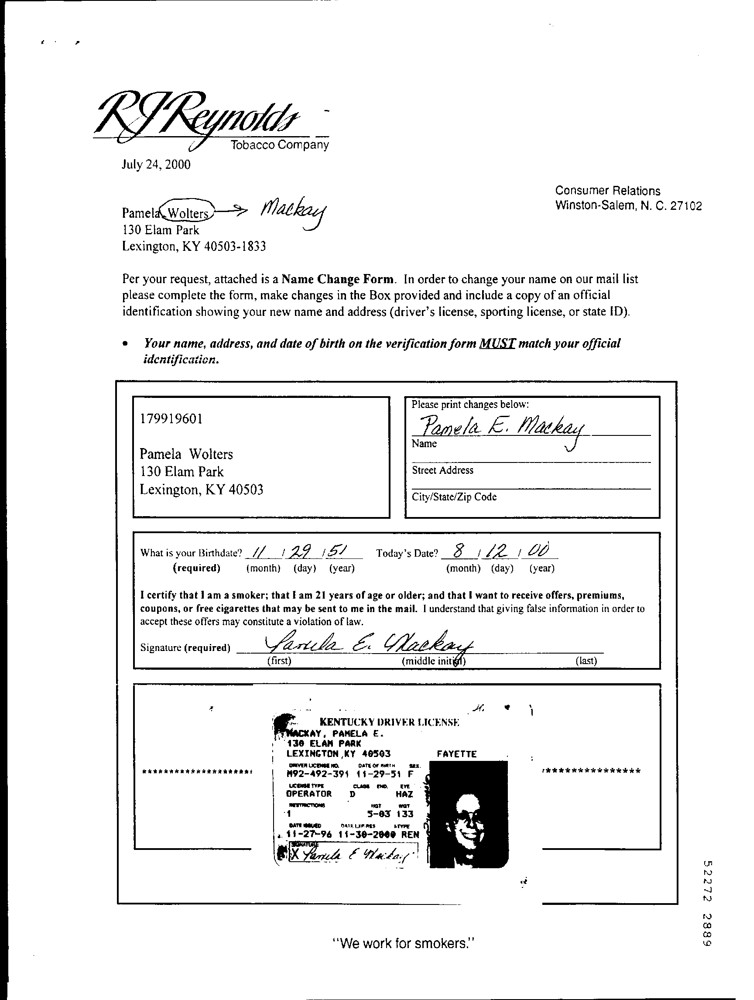

In [ ]:
im = cv2.imread("form17780.jpg")
cv2_imshow(im)

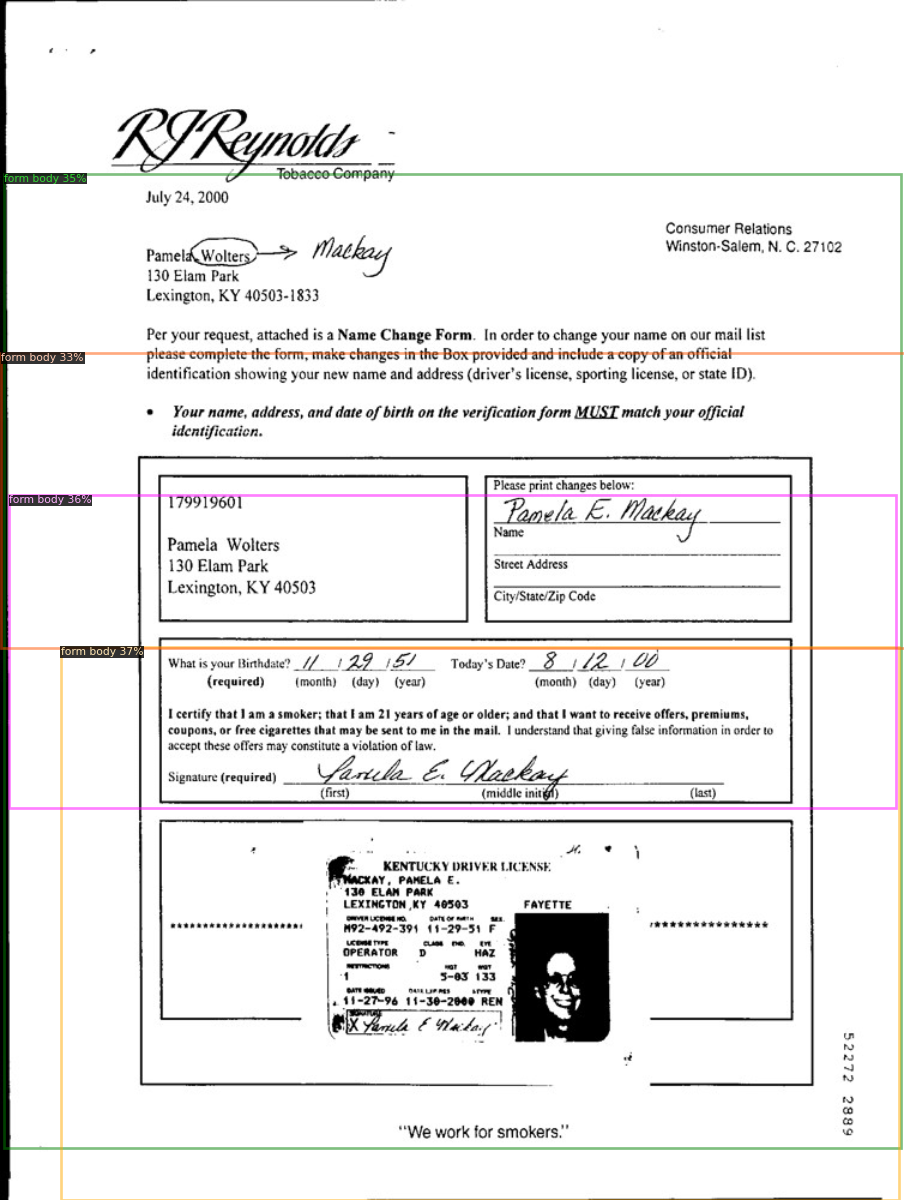

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
s = v.get_image()[:, :, ::-1]
image = np.array(s)
 
cv2_imshow(image)

In [ ]:
from pprint import pprint
# ['form footer', 'subject', 'form instruction', 'form table', 'form header', 'form body', 'address', 'signature', '']
# {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}
classes_ = {'form footer': 0, 'subject': 1,'form instruction': 2,'form table': 3,'form header': 4, 'form body': 5, 'address': 6, 'signature':7 }

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
s = v.get_image()[:, :, ::-1]
image = np.array(s)
print(outputs['instances'].pred_classes)
classes = outputs['instances'].pred_classes.to('cpu')
tensor_box = outputs["instances"].pred_boxes.tensor.to('cpu')
# print(outputs["instances"].pred_boxes.tensor.to('cpu'))
c = 0
for boxes in tensor_box:
  # print(boxes)
  
  # print(classes[c])
  
  x, y, w, h = boxes
  x = int(x)
  y = int(y)
  w = int(w)
  h = int(h)
  im2 = image[y:y+h, x:x+w] 
  for k, v in classes_.items():
    if classes[c] == v:
      c+=1
      pprint({k : extract_from_images(im2)})
      
  # cv2_imshow(im2)
# cv2_imshow(s)

tensor([5, 5, 5, 5], device='cuda:0')
{'form body': 'Fameia Wolters sii\n'
              '130 Elam Park Sweet Address\n'
              'Lexington, KY 40503 Gyan al\n'
              '\n'
              ' \n'
              '\n'
              "What is your Birthdate? _//_ 129 /$7 _ Today'sdae?_3 1 L2 1 0\n"
              '\n'
              '(required) (month) (day) (year) (month) (day) (year)\n'
              '\n'
              'I certify that 1am a smoker; that Iam 21 years of age or older; '
              'and that I want to receive offers, premiums,\n'
              '‘coupons, or free cigarettes that may be sent to me in the '
              'mail. I understand that giving false information in onder to\n'
              'accept these offers may constitute a violation of lve\n'
              '\n'
              'Signature (required) ariel Ez\n'
              '\n'
              'LEXINGTON ey esos FAYETTE\n'
              'Wear Sos 13951 Fe\n'
              'OPERATOR oD waz\n'
              '

IndexError: ignored